## Gradient Descent and Stochastic Gradient Descent

In this lesson, we will learn about two types of fundamental techniques in machine learning - Gradient Descent and Stochastic Gradient Descent.

As we have learnt by now, in machine learning, we typically create models that predict or classify input values.

Furthermore, we now have an intution about a model - we know that it is like an equation or a function.

$$
y = 2x + 3
$$ 

Most of the time, the function would be a bit more complex than this.  For example, it might have multiple inputs and outputs.  For example, 

$$
y = 2x_1 + 3x_2 + 4
$$

### Gradient Descent

Remember from our lesson [Introduction to Functions, Derivatives and Gradients](./func-der-grad.ipynb) that the **gradient** of a function with multiple inputs (or variables  ) is a vector that contains the partial derivatives of the function with respect to each of the input variables. So in other words, it tells us how the output of the function changes as *each* input changes.

To use our hiking analogy, when you are standing on hilly terrain, the gradient is like a compass that tells you the steepest direction and how steep it is at any point on this 3D terrain.

When you look at this "compass" at any point $(x_1, x_2)$, the gradient is like an arrow pointing in the direction of the steepest ascent. In our hiking scenario:
- $x_1$ represents the east-west position on the terrain
- $x_2$ represents the north-south position on the terrain
- The height at any point $(x_1, x_2)$ represents the climbing time for that location

The gradient is a vector that has two components, one for each direction (east-west and north-south).

The intuition behind gradient descent is that we want to move in the direction of the steepest descent (i.e., the opposite direction of the gradient) to find the minimum value of the function, which in this case represents the shortest climbing time.

For hikers, understanding the gradient helps in planning routes, estimating effort, and navigating safely.

In mathematics and machine learning, gradients are crucial for optimization problems - finding the quickest path to the highest point (maximum) or lowest point (minimum) of a function.

Let's imagine a hiker trying to minimize the time it takes to climb a mountain. Our function $f(x_1, x_2)$ calculates the climbing time based on the hiker's position on the terrain.

To perform gradient descent in this hiking context:

1. We start with an initial position on the terrain.
2. We calculate the gradient of the function at our current position. This tells us the direction of the steepest ascent.
3. We then move in the opposite direction of the gradient. This means:
   - If the steepest ascent is towards the east, we move slightly west.
   - If the steepest ascent is towards the north, we move slightly south.
4. We repeat steps 2 and 3 until we find the position that gives us the minimum climbing time.

This process is like a hiker navigating the terrain:
- They start at a random position.
- They look around to determine the steepest direction.
- They take a small step in the opposite direction of the steepest ascent.
- They keep repeating this process until they find the lowest point (shortest climbing time).

Just as the hiker aims to find the fastest way up the mountain, gradient descent in machine learning aims to find the minimum of a function (in this case, minimizing climbing time).

This process is called **gradient descent**.

#### Gradient Descent in code

Lets start by defining our function $f$

$$
f(x) = x_1^2 + x_2^2
$$

where $x = [x_1, x_2]$

In [16]:
def f(x1, x2):
     return x1**2 + x2**2

In [17]:
x1 = 1
x2 = 5
print(f(x1, x2))

26


In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Lets define our  initial values of $x_1$ and $x_2$

In [19]:
x1 = np.linspace(-5, 5, 20)
x2 = np.linspace(-5, 5, 20)

As you can see, we have two arrays of values for $x_1$ and $x_2$. 

In [20]:
y = f(x1, x2)
print(f"y = {y}")

y = [50.         40.02770083 31.1634349  23.40720222 16.75900277 11.21883657
  6.7867036   3.46260388  1.2465374   0.13850416  0.13850416  1.2465374
  3.46260388  6.7867036  11.21883657 16.75900277 23.40720222 31.1634349
 40.02770083 50.        ]


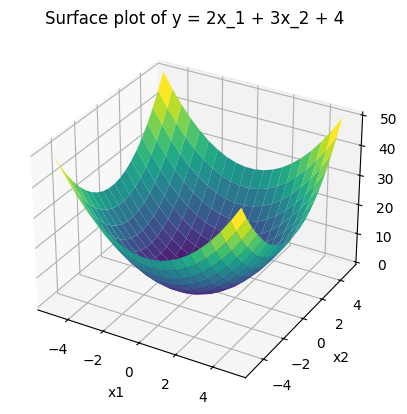

In [21]:

# Create a meshgrid from x1 and x2
X1, X2 = np.meshgrid(x1, x2)

# Define y as a function of x1 and x2 (e.g. y = X1^2 + X2^2)
y = f(X1, X2)

# Create a figure for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X1, X2, y, cmap='viridis')

# Labels
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Surface plot of y = 2x_1 + 3x_2 + 4')

plt.show()

As can be seen from the plot, the function has a minimum value at $(x_1, x_2) = (0, 0)$.  This is the point where the gradient of the function is zero.

So lets define our gradient function from scratch starting with our original function, its derivative and then the partial derivatives (or gradients)

In [22]:
def f(x1, x2):
    return x1**2 + x2**2

def derivative(f, x1, x2, i, h):
    if i == 1:
        return (f(x1+h, x2) - f(x1, x2)) / h
    elif i == 2:
        return (f(x1, x2+h) - f(x1, x2)) / h
    else:
        raise ValueError("Invalid index for partial derivative")

def partial_derivative(f, x1, x2, h):
    # first partial derivative with respect to x1
    pdx1 = derivative(f, x1, x2, 1, h)
    # second partial derivative with respect to x2
    pdx2 = derivative(f, x1, x2, 2, h)
    return np.array([pdx1, pdx2])

pd = partial_derivative(f, x1, x2, 0.1)
print(pd)

[[-9.9        -8.84736842 -7.79473684 -6.74210526 -5.68947368 -4.63684211
  -3.58421053 -2.53157895 -1.47894737 -0.42631579  0.62631579  1.67894737
   2.73157895  3.78421053  4.83684211  5.88947368  6.94210526  7.99473684
   9.04736842 10.1       ]
 [-9.9        -8.84736842 -7.79473684 -6.74210526 -5.68947368 -4.63684211
  -3.58421053 -2.53157895 -1.47894737 -0.42631579  0.62631579  1.67894737
   2.73157895  3.78421053  4.83684211  5.88947368  6.94210526  7.99473684
   9.04736842 10.1       ]]


So now we have the partial derivatives of the function. 

For gradient descent, we need to move in the opposite direction of the gradient.  So we need to multiply the gradient by small number (which is our learning rate) and in the opposite direction.

In [23]:
def gradient_descent_step(f, x1, x2, learning_rate, h=0.1):
    # Calculate the gradient
    grad = partial_derivative(f, x1, x2, h)
    
    # Update x1 and x2
    x1_new = x1 - learning_rate * grad[0]
    x2_new = x2 - learning_rate * grad[1]
    
    return x1_new, x2_new


Then we define the gradient descent function. 

In [24]:
def gradient_descent(f, x1_init, x2_init, learning_rate, num_iterations, h=0.1):
    x1, x2 = x1_init, x2_init
    
    for _ in range(num_iterations):
        x1, x2 = gradient_descent_step(f, x1, x2, learning_rate, h)
        
    return x1, x2

Now lets run the gradient descent function with the initial values of $x_1$ and $x_2$ and the learning rate.

In [28]:
learning_rate = 0.1
num_iterations = 1000

x1_final, x2_final = gradient_descent(f, x1, x2, learning_rate, num_iterations)
print(f"Final values: \n\n x1 = {x1_final}, \n\n x2 = {x2_final} \n")
print(f"Final function value: \n{f(x1_final, x2_final)}")

Final values: 

 x1 = [-0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05
 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05], 

 x2 = [-0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05
 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05] 

Final function value: 
[0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005]


As we can see, the function value is converging to the minimum value of y = 0 (actually an array of zeroes) at $(x_1, x_2)$ being arrays with all values close to zero as well.

### Stochastic Gradient Descent

Stochastic Gradient Descent is a variant of Gradient Descent that is used to optimize machine learning models. It is particularly useful when dealing with large datasets, as it processes data in small batches (or random samples) rather than the entire dataset at once. This makes it more efficient and scalable.

The basic idea behind Stochastic Gradient Descent is to update the model parameters using a single data point at a time, instead of using the entire dataset. This is achieved by randomly selecting a small subset of the data (called a batch) and computing the gradient based on that subset. In our case, we will randomly select and update some values of $x_1$ and $x_2$ at a time.  Remember that in gradient descent, we updated all values of $x_1$ and $x_2$ at once each time.

This process is repeated multiple times until the $x_1$ and $x_2$ converge to a satisfactory state (which in our case is when they are all close to zero).

Stochastic Gradient Descent is more efficient than Gradient Descent because it reduces the computational cost associated with calculating the gradient over the entire dataset. It also helps in avoiding overfitting, as it provides a more diverse set of gradients that can lead to better generalization.

However, the randomness introduced by selecting different batches can cause the algorithm to oscillate around the minimum, preventing it from converging to the global minimum. To address this, techniques like learning rate decay and momentum can be used.

In our case, since our function is quite simple, we won't see much of a difference between Gradient Descent and Stochastic Gradient Descent.  But lets see it in action anyway.

Here is the new code for Stochastic Gradient Descent.  It reuses the code from the previous section.

In [29]:
# New function for stochastic gradient descent
def stochastic_gradient_descent(f, x1_init, x2_init, learning_rate, num_iterations, batch_size, h=0.1):
    x1, x2 = x1_init, x2_init
    n = len(x1)
    
    for _ in range(num_iterations):
        # Randomly select a batch
        indices = np.random.choice(n, batch_size, replace=False)
        x1_batch = x1[indices]
        x2_batch = x2[indices]
        
        # Calculate the gradient for the batch
        grad = np.mean([partial_derivative(f, x1_i, x2_i, h) for x1_i, x2_i in zip(x1_batch, x2_batch)], axis=0)
        
        # Update x1 and x2
        x1 = x1 - learning_rate * grad[0]
        x2 = x2 - learning_rate * grad[1]
    
    return x1, x2

In [31]:
# Stochastic Gradient Descent
batch_size = 5
learning_rate = 0.1
num_iterations = 10000

x1_final_sgd, x2_final_sgd = stochastic_gradient_descent(f, x1, x2, learning_rate, num_iterations, batch_size)
print(f"\nStochastic Gradient Descent Final values: \n\n x1 = {x1_final_sgd}, \n\n x2 = {x2_final_sgd} \n")
print(f"Stochastic Gradient Descent Final function value: \n{f(x1_final_sgd, x2_final_sgd)}")


Stochastic Gradient Descent Final values: 

 x1 = [-4.64097597 -4.11466018 -3.58834439 -3.0620286  -2.53571281 -2.00939702
 -1.48308123 -0.95676544 -0.43044965  0.09586614  0.62218193  1.14849772
  1.67481351  2.2011293   2.72744508  3.25376087  3.78007666  4.30639245
  4.83270824  5.35902403], 

 x2 = [-4.64097597 -4.11466018 -3.58834439 -3.0620286  -2.53571281 -2.00939702
 -1.48308123 -0.95676544 -0.43044965  0.09586614  0.62218193  1.14849772
  1.67481351  2.2011293   2.72744508  3.25376087  3.78007666  4.30639245
  4.83270824  5.35902403] 

Stochastic Gradient Descent Final function value: 
[4.30773159e+01 3.38608568e+01 2.57524309e+01 1.87520383e+01
 1.28596789e+01 8.07535277e+00 4.39905987e+00 1.83080022e+00
 3.70573806e-01 1.83806327e-02 7.74220701e-01 2.63809401e+00
 5.61000056e+00 9.68994035e+00 1.48779134e+01 2.11739197e+01
 2.85779592e+01 3.70900319e+01 4.67101379e+01 5.74382772e+01]
